<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-18/litao3_dryEIS_ycut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install impedance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 761.9 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 937, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 937 (delta 149), reused 30 (delta 21), pack-reused 710
Receiving objects: 100% (937/937), 50.90 MiB | 10.72 MiB/s, done.
Resolving deltas: 100% (518/518), done.
Updating files: 100% (124/124), done.


'/content'

### 18-07-24 EIS on ungated and dry sample of LiTaO3, Ycut



In [4]:
%cd "/content/gator/data/07-18/"

/content/gator/data/07-18


### High to low

/usr/local/lib/python3.10/dist-packages/impedance/models/circuits/circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
/usr/local/lib/python3.10/dist-packages/impedance/models/circuits/elements.py:81: RuntimeWarning: divide by zero encountered in divide
  z += 1 / elem


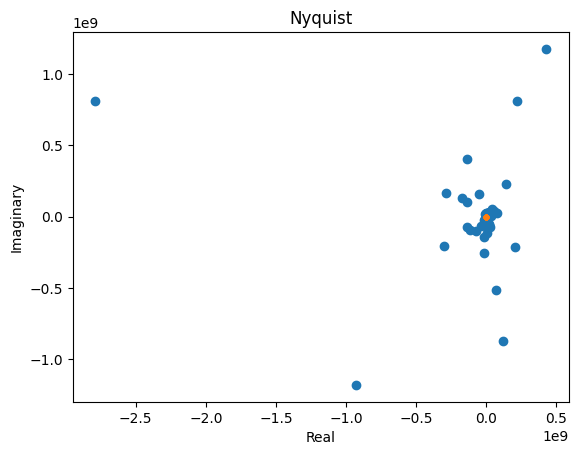

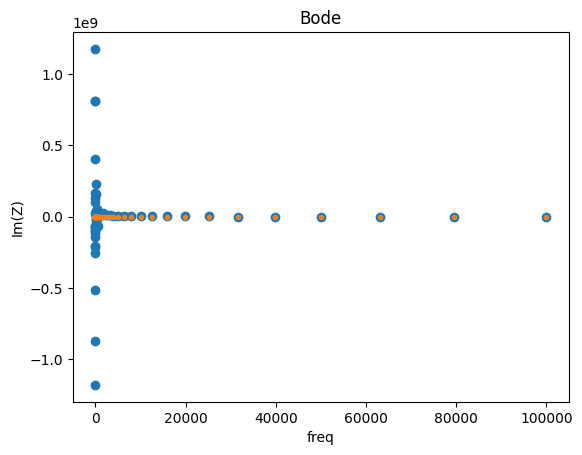

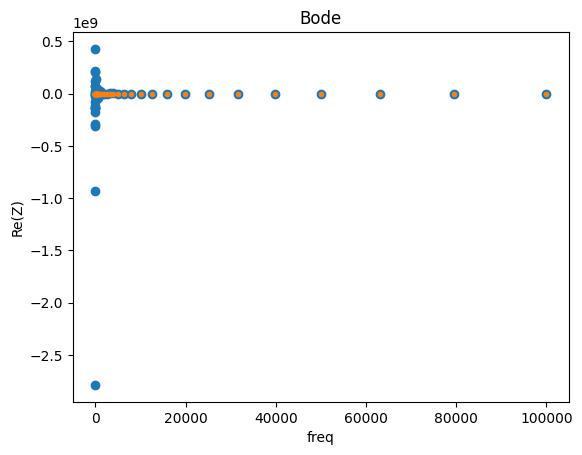

In [5]:
freqs, Z = preprocessing.readZPlot('YcutLiTaO3-Dryhtol.z')

circuit = 'R0,C0'
init = [0, 10**-24]

circuit = CustomCircuit(circuit, initial_guess=init)
# circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [6]:
print(circuit)


Circuit string: R0,C0
Fit: False

Initial guesses:
     R0 = 0.00e+00 [Ohm]
     C0 = 1.00e-24 [F]



In [7]:
freqs.shape

(61,)

Low to high

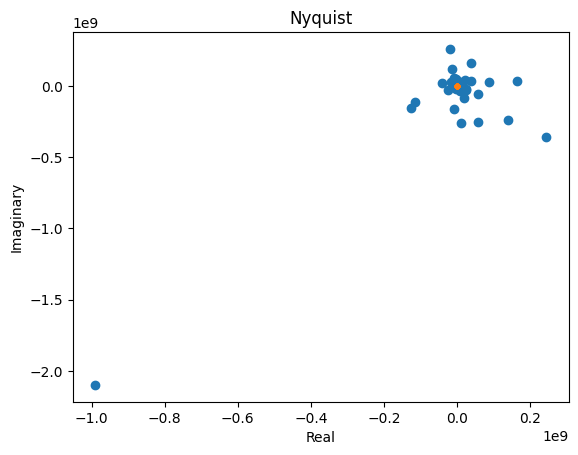

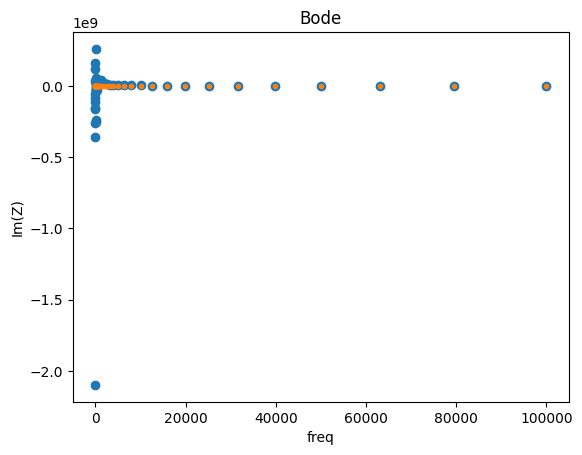

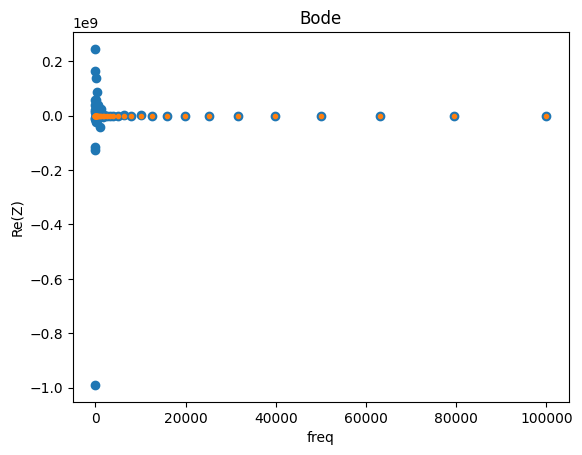

In [12]:
freqs, Z = preprocessing.readZPlot('YcutLiTaO3-Dryltoh.z')

circuit = 'R0,C0'
init = [0, 10**-24]

circuit = CustomCircuit(circuit, initial_guess=init)
# circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

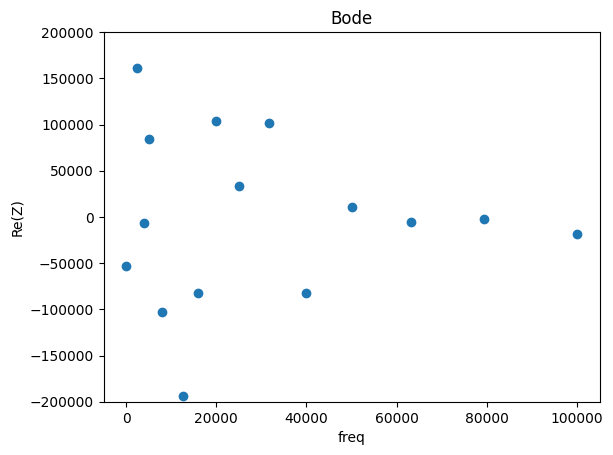

In [23]:
cut=0
plt.ylim((-2*1e5, 2*1e5))
plt.plot(freqs[cut:], Z.real[cut:], 'o')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [25]:
print(len(freqs))

51
